In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#this is a set of sheets, each sheet contains daily sea ice data for NSIDC record (1978-2024)
df=pd.read_excel('./NSIDC_Regional_Daily_Data.xlsx', sheet_name=None)
sheet_names = list(df.keys())
print(sheet_names)

['Baffin-Area-km^2', 'Baffin-Extent-km^2', 'Barents-Area-km^2', 'Barents-Extent-km^2', 'Beaufort-Area-km^2', 'Beaufort-Extent-km^2', 'Bering-Area-km^2', 'Bering-Extent-km^2', 'CanadianArchipelago-Area-km^2', 'CanadianArchipelago-Extent-km^2', 'Central-Arctic-Area-km^2', 'Central-Arctic-Extent-km^2', 'Chukchi-Area-km^2', 'Chukchi-Extent-km^2', 'East-Siberian-Area-km^2', 'East-Siberian-Extent-km^2', 'Greenland-Area-km^2', 'Greenland-Extent-km^2', 'Hudson-Area-km^2', 'Hudson-Extent-km^2', 'Kara-Area-km^2', 'Kara-Extent-km^2', 'Laptev-Area-km^2', 'Laptev-Extent-km^2', 'Okhotsk-Area-km^2', 'Okhotsk-Extent-km^2', 'St-Lawrence-Area-km^2', 'St-Lawrence-Extent-km^2', 'Documentation']


In [3]:
# List of regions we want to sum
regions = ['Bering', 'Beaufort', 'Chukchi', 'East-Siberian']
variable = 'Extent-km^2' #variable we're interested in

#find total extent
total_extent = sum(df[f'{region}-{variable}'].iloc[:, 2:] for region in regions)

#append to month/day labels to total_extent
result = pd.concat([df[f'{regions[0]}-{variable}'][['month', 'day']], total_extent], axis=1)

#forward month names
result['month'] = result['month'].ffill()

result

,month,day,1978,1979,1980,1981,1982,1983,1984,1985,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,January,1,NaN,3426668.894,3609406.947,3681355.824,3466632.767,3516591.335,3315885.245,3434057.149,...,3313845.788,3525357.415,3293992.149,3202931.175,3509124.822,3402733.907,3338373.457,3467427.818,3406989.342,3561054.992
1,January,2,NaN,3407768.702,3595365.951,3692350.077,3470412.067,3524371.427,3361572.495,3436568.729,...,3305046.099,3523575.524,3257516.750,3224597.772,3516678.821,3425263.343,3338423.322,3487534.031,3415865.490,3565766.161
2,January,3,NaN,3377990.666,3605856.252,3699167.832,3474602.684,3547337.360,3409130.607,3451111.034,...,3294115.369,3520342.542,3228198.085,3242710.441,3520725.061,3452376.772,3346444.744,3513016.274,3426343.235,3568628.776
3,January,4,NaN,3356464.365,3605267.231,3706352.122,3491559.082,3566380.985,3440222.062,3442058.622,...,3281142.292,3517088.389,3215090.148,3251579.844,3518626.134,3475861.812,3358128.004,3532529.459,3442247.218,3567080.732
4,January,5,NaN,3341690.040,3617743.715,3700084.427,3501721.273,3590632.481,3477675.984,3432772.844,...,3266124.630,3515816.823,3205934.159,3256932.428,3528137.179,3500873.328,3368546.529,3551015.915,3463703.623,3568562.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,December,27,3437939.627,3573151.819,3594889.280,3483272.957,3502846.822,3204022.959,3380632.272,3362644.920,...,3501820.071,3262363.871,3103980.555,3440628.455,3272024.003,3314423.147,3444442.368,3355012.788,3483135.788,NaN
362,December,28,3452260.573,3594597.526,3616381.959,3491565.059,3502241.599,3189486.594,3389300.838,3327554.511,...,3519966.474,3297655.050,3112024.599,3446231.401,3300063.341,3322086.730,3444135.448,3373948.291,3500617.410,NaN
363,December,29,3457281.973,3610234.457,3627827.702,3481720.317,3511226.139,3215143.153,3395361.932,3309816.837,...,3529808.495,3311213.838,3129025.489,3463864.435,3327260.346,3327295.225,3441714.112,3389523.118,3521468.480,NaN
364,December,30,3467274.966,3609167.736,3646818.219,3468633.272,3510567.462,3229355.609,3403239.617,3306512.198,...,3530729.093,3308785.749,3151314.028,3485584.658,3355748.640,3328910.892,3446047.135,3396002.453,3542232.476,NaN


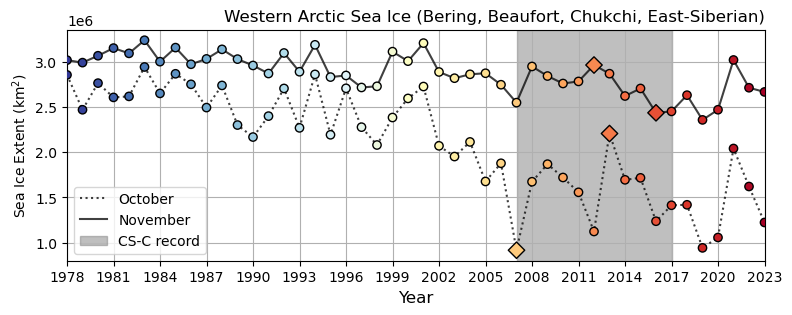

In [4]:
#select month of interest
MONTH = 'October'
df_month = result.iloc[result.index[result.month==MONTH]]

#find mean extent of that month by averaging the days
NSIDC_yrs = df_month.columns[2:-1]
df_month_avg = df_month[NSIDC_yrs].mean(axis=0)

#let's make a timeseries plot of this
fig,ax = plt.subplots(1,1,figsize=(9,3))
#color points based on year
colors = plt.cm.RdYlBu_r(np.linspace(0,1,len(NSIDC_yrs)))

# Plot the average for the selected month
ax.plot(NSIDC_yrs, df_month_avg, linestyle=':', color='k', alpha=0.75, label=MONTH)
ax.scatter(NSIDC_yrs, df_month_avg, c=colors, zorder=100, edgecolor='k')

# Plot the 5-year running mean
#running_mean = df_month_avg.rolling(window=5, center=True).mean()
#ax.plot(running_mean.keys(), running_mean, linestyle='--', color='b', label=f'{MONTH} (5 yr window)', linewidth=2)

#from the cloudsat-calipso valid years (2007-2018) find sea ice extrema
CSC_yrs = range(2007,2018)
extreme_yrs = [df_month_avg[CSC_yrs].idxmin() , df_month_avg[CSC_yrs].idxmax()]

# Create a mask for extreme years and plot them with a different marker
extreme_mask = NSIDC_yrs.isin(extreme_yrs)
ax.scatter(NSIDC_yrs[extreme_mask], df_month_avg[extreme_mask], c=colors[extreme_mask], 
           marker='D', zorder=105, s=70, edgecolor='k')


#repeat for Novemebr
MONTH = 'November'
df_month = result.iloc[result.index[result.month==MONTH]]
df_month_avg = df_month[NSIDC_yrs].mean(axis=0)

ax.plot(NSIDC_yrs, df_month_avg, linestyle='solid', color= 'k', alpha=0.75, label = MONTH) 
ax.scatter(NSIDC_yrs, df_month_avg, c= colors, zorder=100, edgecolor='k')

#running_mean = df_month_avg.rolling(window=5, center=True).mean()
#ax.plot(running_mean.keys(), running_mean, linestyle='--', color='r', label=f'{MONTH} (5 yr window)', linewidth=2)

extreme_yrs = [df_month_avg[CSC_yrs].idxmin() , df_month_avg[CSC_yrs].idxmax()]
extreme_mask = NSIDC_yrs.isin(extreme_yrs)
ax.scatter(NSIDC_yrs[extreme_mask], df_month_avg[extreme_mask], c=colors[extreme_mask], 
           marker='D', zorder=105, s=70, edgecolor='k')


#shade the csc-valid years
ym, yM= ax.get_ylim()
ax.fill_between([CSC_yrs[0], CSC_yrs[-1]], y2=[yM,yM], y1=[ym,ym], color = 'gray', alpha=0.5, label = 'CS-C record')

#axis formatting stuff
ax.set_xticks(list(NSIDC_yrs)[::3])
ax.grid()
ax.legend()


region_str = ", ".join(regions)
ax.set_title(f'Western Arctic Sea Ice ({region_str})', loc='right')
ax.set_ylabel('Sea Ice Extent (km$^2$)')
ax.set_xlabel('Year', fontsize='large')
ax.set_xlim(NSIDC_yrs[0], NSIDC_yrs[-1])
ax.set_ylim(ym,yM)

plt.savefig('nsidc-record.png', dpi=300, bbox_inches='tight')
plt.show()